In [32]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
with open('grid_result.pickle', 'rb') as f:
    searches = pickle.load(f)

with open('grid_result_laptop.pickle', 'rb') as f:
    searches2 = pickle.load(f)

In [35]:
df = pd.DataFrame.from_dict(searches)
df_temp = pd.concat([pd.DataFrame.from_dict(search['exploration_param'],orient='index').T for search in searches]).reset_index(drop=True)
df = pd.concat([df,df_temp],axis=1)
df = df.drop('exploration_param',axis=1)

In [45]:
df2 = pd.DataFrame.from_dict(searches2)
df_temp = pd.concat([pd.DataFrame.from_dict(search['exploration_param'],orient='index').T for search in searches2]).reset_index(drop=True)
df2 = pd.concat([df2,df_temp],axis=1)
df2 = df2.drop('exploration_param',axis=1)

In [46]:
df = pd.concat([df,df2])

In [50]:
df.columns

Index(['layer1', 'layer2', 'lr', 'lr_target', 'exploration_strat', 'gamma',
       'batch_size', 'memory_size', 'avg_reward', 'total_episodes',
       'eps_start', 'eps_decay', 'eps_end', 'temp'],
      dtype='object')

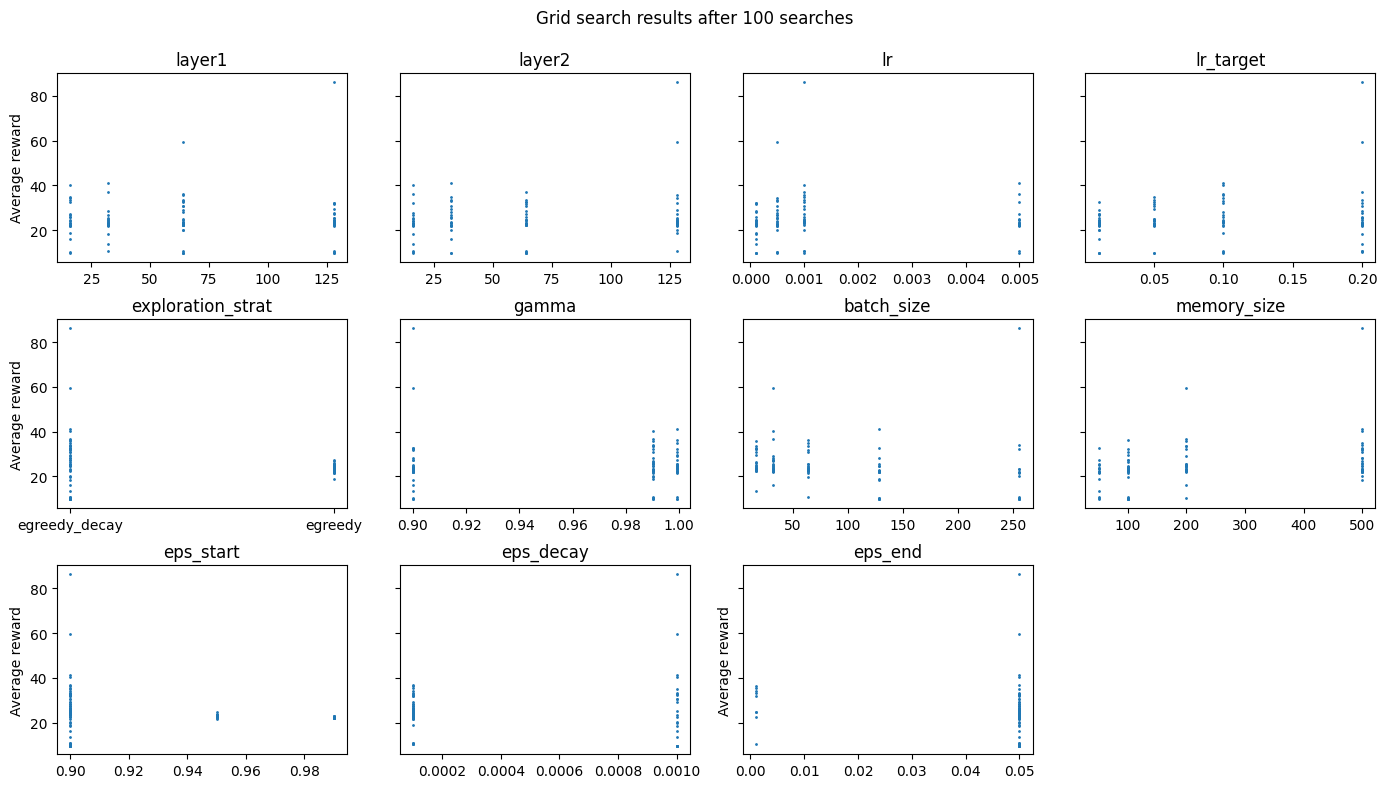

In [74]:
parameters = ['layer1', 'layer2', 'lr', 'lr_target', 'exploration_strat', 'gamma',
       'batch_size', 'memory_size', 'eps_start', 'eps_decay', 'eps_end']

fig,axs = plt.subplots(3,4,figsize=(14,8), sharey=True)
for i,(param,ax) in enumerate(zip(parameters,axs.ravel())):
       ax.scatter(df[param],df['avg_reward'],s=1)
       ax.set_title(param)
       if i%4==0:
              ax.set_ylabel('Average reward')
fig.delaxes(axs.flatten()[-1])
plt.ylabel('Average reward')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  
plt.suptitle(f'Grid search results after {len(df)} searches')
plt.show()

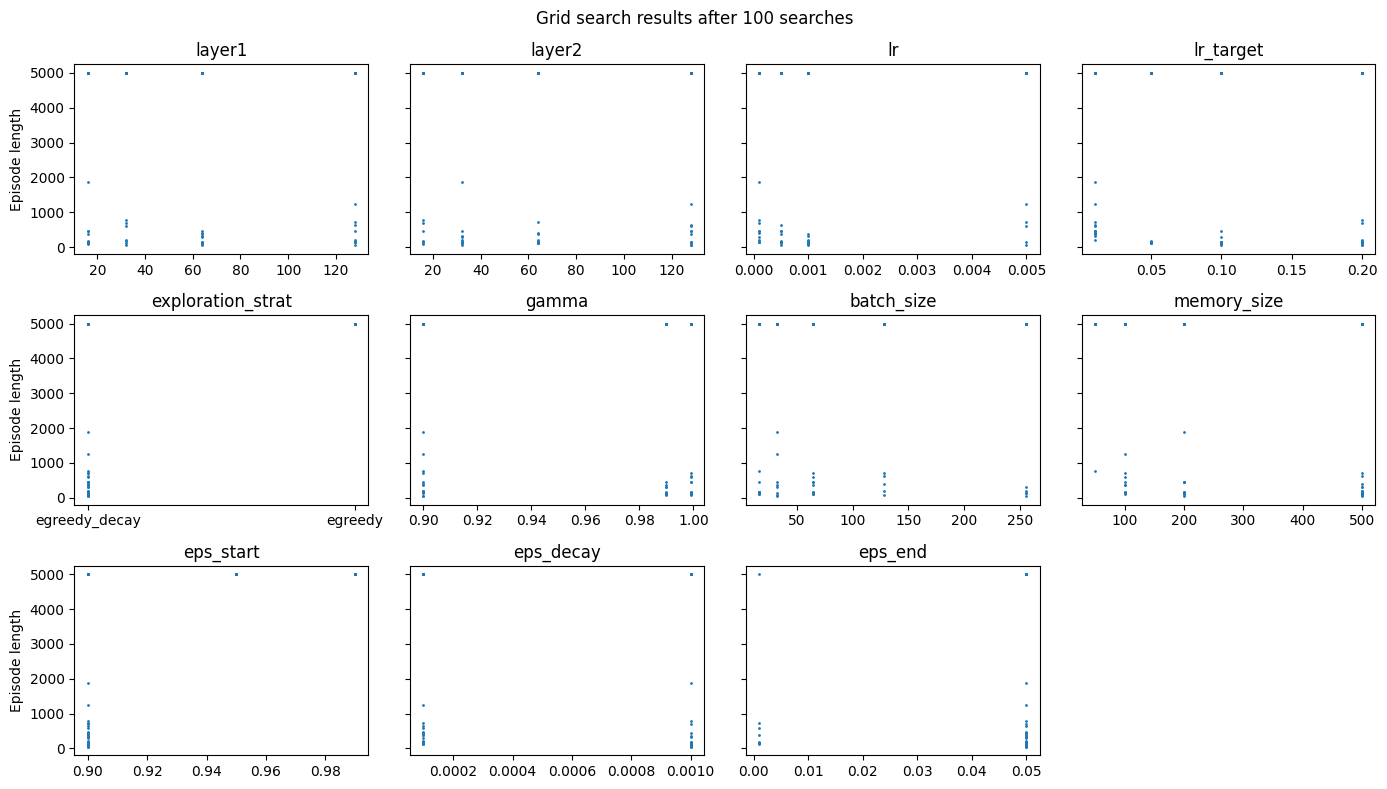

In [72]:
parameters = ['layer1', 'layer2', 'lr', 'lr_target', 'exploration_strat', 'gamma',
       'batch_size', 'memory_size', 'eps_start', 'eps_decay', 'eps_end']


fig,axs = plt.subplots(3,4,figsize=(14,8), sharey=True)
for i,(param,ax) in enumerate(zip(parameters,axs.ravel())):
       ax.scatter(df[param],df['total_episodes'],s=1)
       ax.set_title(param)
       if i%4==0:
              ax.set_ylabel('Episode length')
plt.suptitle(f'Grid search results after {len(df)} searches')
fig.delaxes(axs.flatten()[-1])
plt.tight_layout()
plt.show()

In [56]:
df.sort_values('total_episodes').head(20)

,layer1,layer2,lr,lr_target,exploration_strat,gamma,batch_size,memory_size,avg_reward,total_episodes,eps_start,eps_decay,eps_end,temp
30,128,128,0.0010,0.20,egreedy_decay,0.900,256,500,86.360000,50,0.9,0.0010,0.050,0.1
16,64,128,0.0005,0.20,egreedy_decay,0.900,32,200,59.549020,51,0.9,0.0010,0.050,0.1
46,32,32,0.0050,0.10,egreedy_decay,0.999,128,500,41.082192,73,0.9,0.0010,0.050,0.1
44,16,16,0.0010,0.10,egreedy_decay,0.990,32,500,40.261364,88,0.9,0.0010,0.050,0.1
1,64,32,0.0010,0.05,egreedy_decay,0.990,64,200,33.458716,109,0.9,0.0010,0.050,0.1
11,64,32,0.0010,0.05,egreedy_decay,0.990,64,500,30.767857,112,0.9,0.0010,0.050,0.1
0,16,64,0.0010,0.05,egreedy_decay,0.999,16,100,32.400000,115,0.9,0.0010,0.050,0.1
23,64,128,0.0010,0.10,egreedy_decay,0.990,16,200,35.677966,118,0.9,0.0001,0.001,0.1
28,32,64,0.0010,0.20,egreedy_decay,0.990,32,200,36.838710,124,0.9,0.0001,0.050,0.1
15,64,64,0.0005,0.20,egreedy_decay,0.999,16,100,30.773438,128,0.9,0.0010,0.050,0.1


In [57]:
df.sort_values('avg_reward',ascending=False).head(20)

,layer1,layer2,lr,lr_target,exploration_strat,gamma,batch_size,memory_size,avg_reward,total_episodes,eps_start,eps_decay,eps_end,temp
30,128,128,0.0010,0.20,egreedy_decay,0.900,256,500,86.360000,50,0.9,0.0010,0.050,0.1
16,64,128,0.0005,0.20,egreedy_decay,0.900,32,200,59.549020,51,0.9,0.0010,0.050,0.1
46,32,32,0.0050,0.10,egreedy_decay,0.999,128,500,41.082192,73,0.9,0.0010,0.050,0.1
44,16,16,0.0010,0.10,egreedy_decay,0.990,32,500,40.261364,88,0.9,0.0010,0.050,0.1
28,32,64,0.0010,0.20,egreedy_decay,0.990,32,200,36.838710,124,0.9,0.0001,0.050,0.1
48,64,16,0.0050,0.10,egreedy_decay,0.999,64,100,36.171053,152,0.9,0.0001,0.001,0.1
23,64,128,0.0010,0.10,egreedy_decay,0.990,16,200,35.677966,118,0.9,0.0001,0.001,0.1
3,16,32,0.0010,0.05,egreedy_decay,0.999,64,500,34.972973,148,0.9,0.0010,0.050,0.1
44,16,128,0.0005,0.10,egreedy_decay,0.990,256,500,34.188811,143,0.9,0.0001,0.001,0.1
1,64,32,0.0010,0.05,egreedy_decay,0.990,64,200,33.458716,109,0.9,0.0010,0.050,0.1
